In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('J:/Data science/ML/Pyhon for ML/3.1 UNZIP_ME_FOR_NOTEBOOKS_V4/DATA/Advertising.csv')

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
x = df.drop('sales',axis=1)

In [6]:
y = df['sales']

**From Preprocessing, import PolynomialFeatures, which will help us transform our original data set by adding polynomial features**

We will go from the equation in the form (shown here as if we only had one x feature):

$$\hat{y} = \beta_0 + \beta_1x_1 + \epsilon $$

and create more features from the original x feature for some *d* degree of polynomial.

$$\hat{y} = \beta_0 + \beta_1x_1 + \beta_1x^2_1 +  ... + \beta_dx^d_1 + \epsilon$$

Then we can call the linear regression model on it, since in reality, we're just treating these new polynomial features x^2, x^3, ... x^d as new features. Obviously we need to be careful about choosing the correct value of *d* , the degree of the model. Our metric results on the test set will help us with this!

**The other thing to note here is we have multiple X features, not just a single one as in the formula above, so in reality, the PolynomialFeatures will also take *interaction* terms into account for example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].**

In [7]:
from sklearn.preprocessing import PolynomialFeatures

In [8]:
poly_converter = PolynomialFeatures(degree=2,include_bias=False)

In [9]:
poly_feature = poly_converter.fit_transform(x)

In [10]:
poly_feature.shape

(200, 9)

In [11]:
x.shape

(200, 3)

In [12]:
x.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [13]:
print(poly_feature[0])
print(len(poly_feature[0]))

[2.301000e+02 3.780000e+01 6.920000e+01 5.294601e+04 8.697780e+03
 1.592292e+04 1.428840e+03 2.615760e+03 4.788640e+03]
9


In [19]:
230.1*37.8

8697.779999999999

In [18]:
2.301000e+02 **2

52946.009999999995

In [17]:
poly_feature[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [17]:
#quardretic terms
poly_feature[0][:3]**2

array([52946.01,  1428.84,  4788.64])

In [18]:
#interaction term
230.1*37.8

8697.779999999999

In [19]:
230.1*69.2

15922.92

In [20]:
37.8*69.2

2615.7599999999998

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test = train_test_split(poly_feature,y,test_size=0.3,random_state=101)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
poly_model = LinearRegression(fit_intercept=True)

In [25]:
poly_model.fit(x_train,y_train)

LinearRegression()

In [26]:
y_prediction = poly_model.predict(x_test)
y_prediction

array([13.94856153, 19.33480262, 12.31928162, 16.76286337,  7.90210901,
        6.94143792, 20.13372693, 17.50092709, 10.56889   , 20.12551788,
        9.44614537, 14.09935417, 12.05513493, 23.39254049, 19.67508393,
        9.15626258, 12.1163732 ,  9.28149557,  8.44604007, 21.65588129,
        7.05070331, 19.35854208, 27.26716369, 24.58689346,  9.03179421,
       11.81070232, 20.42630125,  9.19390639, 12.74795186,  8.64340674,
        8.66294151, 20.20047377, 10.93673817,  6.84639129, 18.27939359,
        9.47659449, 10.34242145,  9.6657038 ,  7.43347915, 11.03561332,
       12.65731013, 10.65459946, 11.20971496,  7.46199023, 11.38224982,
       10.27331262,  6.15573251, 15.50893362, 13.36092889, 22.71839277,
       10.40389682, 13.21622701, 14.23622207, 11.8723677 , 11.68463616,
        5.62217738, 25.03778913,  9.53507734, 17.37926571, 15.7534364 ])

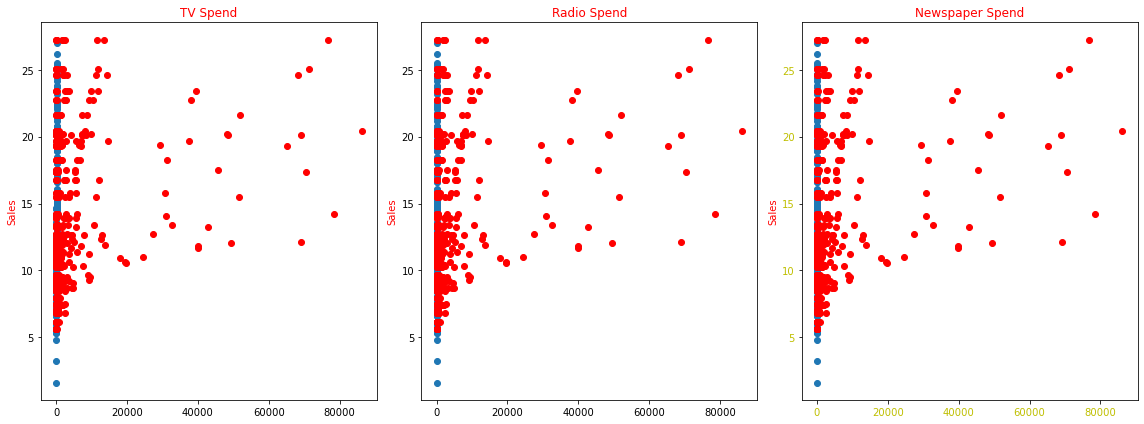

In [32]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(x_test,y_prediction,'o',color='red')
axes[0].set_ylabel("Sales",c='r')
axes[0].set_title("TV Spend",c='r')

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(x_test,y_prediction,'o',color='red')
axes[1].set_title("Radio Spend",c='r')
axes[1].set_ylabel("Sales",c='r')

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(x_test,y_prediction,'o',color='red')
axes[2].set_title("Newspaper Spend",c='r');
axes[2].set_ylabel("Sales",c='r')
plt.xticks(c='y')
plt.yticks(c='y')
plt.tight_layout();


plt.show()

C:\Users\Abdelrahman\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



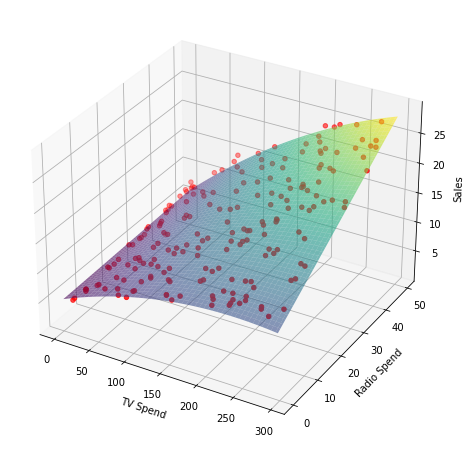

In [35]:

# Create a meshgrid for TV and radio
tv_range = np.linspace(df['TV'].min(), df['TV'].max(), 100)
radio_range = np.linspace(df['radio'].min(), df['radio'].max(), 100)
tv_mesh, radio_mesh = np.meshgrid(tv_range, radio_range)

# Create the feature matrix for the meshgrid
mesh_feature = np.c_[tv_mesh.ravel(), radio_mesh.ravel(), np.zeros_like(tv_mesh.ravel())]

# Transform the meshgrid features to polynomial features
mesh_poly_feature = poly_converter.transform(mesh_feature)

# Predict the sales values
sales_pred = poly_model.predict(mesh_poly_feature).reshape(tv_mesh.shape)

# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(tv_mesh, radio_mesh, sales_pred, cmap='viridis', alpha=0.6)

# Plot the actual data points
ax.scatter(df['TV'], df['radio'], df['sales'], c='r', marker='o')

# Set labels
ax.set_xlabel('TV Spend')
ax.set_ylabel('Radio Spend')
ax.set_zlabel('Sales')

# Show the plot
plt.show()

In [36]:

# --- 3D PLOT: TV vs. Radio vs. Sales ---
fig = go.Figure()

# Add actual training data points
fig.add_trace(go.Scatter3d(
    x=X_train[:, 0], y=X_train[:, 1], z=y_train,
    mode='markers', marker=dict(size=6, color='blue', opacity=0.6),
    name='Training Data'
))

# Add actual testing data points
fig.add_trace(go.Scatter3d(
    x=X_test[:, 0], y=X_test[:, 1], z=y_test,
    mode='markers', marker=dict(size=6, color='red', opacity=0.8),
    name='Testing Data'
))

# Add predicted test data points
fig.add_trace(go.Scatter3d(
    x=X_test[:, 0], y=X_test[:, 1], z=y_pred,
    mode='markers', marker=dict(size=8, color='green', symbol='x', opacity=0.9),
    name='Predicted Test Data'
))

# Generate polynomial regression surface
tv_range = np.linspace(X['TV'].min(), X['TV'].max(), 10)
radio_range = np.linspace(X['radio'].min(), X['radio'].max(), 10)
tv_grid, radio_grid = np.meshgrid(tv_range, radio_range)

# Create polynomial features for the grid
grid_features = np.c_[tv_grid.ravel(), radio_grid.ravel(), np.full_like(tv_grid.ravel(), X['newspaper'].mean())]
grid_features_poly = poly_converter.transform(grid_features)

# Predict sales for the regression plane
sales_grid = poly_model.predict(grid_features_poly).reshape(tv_grid.shape)

# Add regression surface
fig.add_trace(go.Surface(
    x=tv_grid, y=radio_grid, z=sales_grid,
    colorscale='Viridis', opacity=0.5, showscale=False,
    name='Regression Plane'
))

# Update layout
fig.update_layout(
    title="3D Polynomial Regression: TV & Radio vs Sales",
    scene=dict(
        xaxis_title="TV Spend",
        yaxis_title="Radio Spend",
        zaxis_title="Sales"
    ),
    width=800,
    height=700
)

# Show interactive 3D plot
fig.show()


C:\Users\Abdelrahman\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



In [30]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [31]:
mae = mean_absolute_error(y_test,y_prediction)
mse = mean_squared_error(y_test,y_prediction)
rmse = np.sqrt(mse)

In [32]:
mae

0.48967980448037

In [33]:
mse

0.4417505510403648